# Data Preprocessing, EDA, and Feature Engineering

This notebook contains all the data preprocessing, exploratory data analysis, and feature engineering steps for the Satellite Imagery-Based Property Valuation project.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


## 1. Data Loading


In [2]:
# Load the raw dataset
CSV_PATH = r"C:\Users\aksha\OneDrive\Desktop\satellite\data\train(1)(train(1)).csv"
IMAGE_DIR = r"C:\Users\aksha\OneDrive\Desktop\satellite\property_images"

df = pd.read_csv(CSV_PATH)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
df.head()


Dataset shape: (16209, 21)
Columns: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

First few rows:


id             date   price  bedrooms  bathrooms  sqft_living  \
0  9117000170  20150505T000000  268643         4       2.25         1810   
1  6700390210  20140708T000000  245000         3       2.50         1600   
2  7212660540  20150115T000000  200000         4       2.50         1720   
3  8562780200  20150427T000000  352499         2       2.25         1240   
4  7760400350  20141205T000000  232000         3       2.00         1280   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      9240     2.0           0     0          3      7        1810   
1      2788     2.0           0     0          4      7        1600   
2      8638     2.0           0     0          3      8        1720   
3       705     2.0           0     0          3      7        1150   
4     13356     1.0           0     0          3      7        1280   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1961             0    98055  47.4362 -122.187   
1              0      1992             0    98031  47.4034 -122.187   
2              0      1994             0    98003  47.2704 -122.313   
3             90      2009             0    98027  47.5321 -122.073   
4              0      1994             0    98042  47.3715 -122.074   

   sqft_living15  sqft_lot15  
0           1660        9240  
1           1720        3605  
2           1870        7455  
3           1240         750  
4           1590        8071

In [3]:
# Check for the existence of the physical image file for each row
df['image_exists'] = df['id'].apply(lambda x: os.path.exists(os.path.join(IMAGE_DIR, f"{x}.png")))

print(f"Total properties: {len(df)}")
print(f"Properties with images: {df['image_exists'].sum()}")
print(f"Properties without images: {(~df['image_exists']).sum()}")


Total properties: 16209
Properties with images: 16209
Properties without images: 0


## 2. Missing Value Analysis


In [4]:
# Calculate missing values for tabular columns
tabular_missing = df.isnull().sum()

# Calculate missing values for images
image_missing_count = len(df) - df['image_exists'].sum()

# Combine for a comprehensive report
missing_report = tabular_missing.to_frame(name='Missing Values')
missing_report.loc['SATELLITE_IMAGE'] = image_missing_count

print("--- Missing Value Analysis ---")
print(missing_report[missing_report['Missing Values'] > 0])
print(f"\nTotal Rows in Dataset: {len(df)}")
print(f"Percentage of complete records: {(1 - missing_report['Missing Values'].sum() / len(df)) * 100:.2f}%")


--- Missing Value Analysis ---
Empty DataFrame
Columns: [Missing Values]
Index: []

Total Rows in Dataset: 16209
Percentage of complete records: 100.00%


## 3. Exploratory Data Analysis (EDA)


In [5]:
# Basic statistics
print("=== Dataset Overview ===")
print(f"\nShape: {df.shape}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nBasic Statistics:")
df.describe()


=== Dataset Overview ===

Shape: (16209, 22)

Data Types:
id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
image_exists        bool
dtype: object

Basic Statistics:


id         price     bedrooms     bathrooms   sqft_living  \
count  1.620900e+04  1.620900e+04  16209.00000  16209.000000  16209.000000   
mean   4.575771e+09  5.374703e+05      3.36782      2.113054   2073.274601   
std    2.874661e+09  3.603036e+05      0.93327      0.765242    907.009491   
min    1.000102e+06  7.500000e+04      0.00000      0.000000    290.000000   
25%    2.123049e+09  3.200000e+05      3.00000      1.500000   1430.000000   
50%    3.904950e+09  4.500000e+05      3.00000      2.250000   1910.000000   
75%    7.304301e+09  6.400000e+05      4.00000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.00000      8.000000  12050.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.620900e+04  16209.000000  16209.000000  16209.000000  16209.000000   
mean   1.486767e+04      1.498828      0.006971      0.234253      3.407860   
std    3.882570e+04      0.543032      0.083206      0.763152      0.651553   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.004000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.599000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.063100e+04      2.000000      0.000000      0.000000      4.000000   
max    1.164794e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  16209.000000  16209.000000   16209.000000  16209.000000  16209.000000   
mean       7.652971   1784.754396     288.520205   1971.152755     82.738108   
std        1.171050    821.820844     438.598910     29.372698    397.861148   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1200.000000       0.000000   1952.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2200.000000     560.000000   1997.000000      0.000000   
max       13.000000   8860.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  16209.000000  16209.000000  16209.000000   16209.000000   16209.000000  
mean   98077.974767     47.560707   -122.214003    1983.152261   12735.572707  
std       53.355282      0.138340      0.140093     681.905161   26933.162012  
min    98001.000000     47.159300   -122.519000     399.000000     651.000000  
25%    98033.000000     47.472500   -122.328000    1480.000000    5098.000000  
50%    98065.000000     47.572400   -122.230000    1840.000000    7620.000000  
75%    98117.000000     47.678200   -122.125000    2360.000000   10053.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

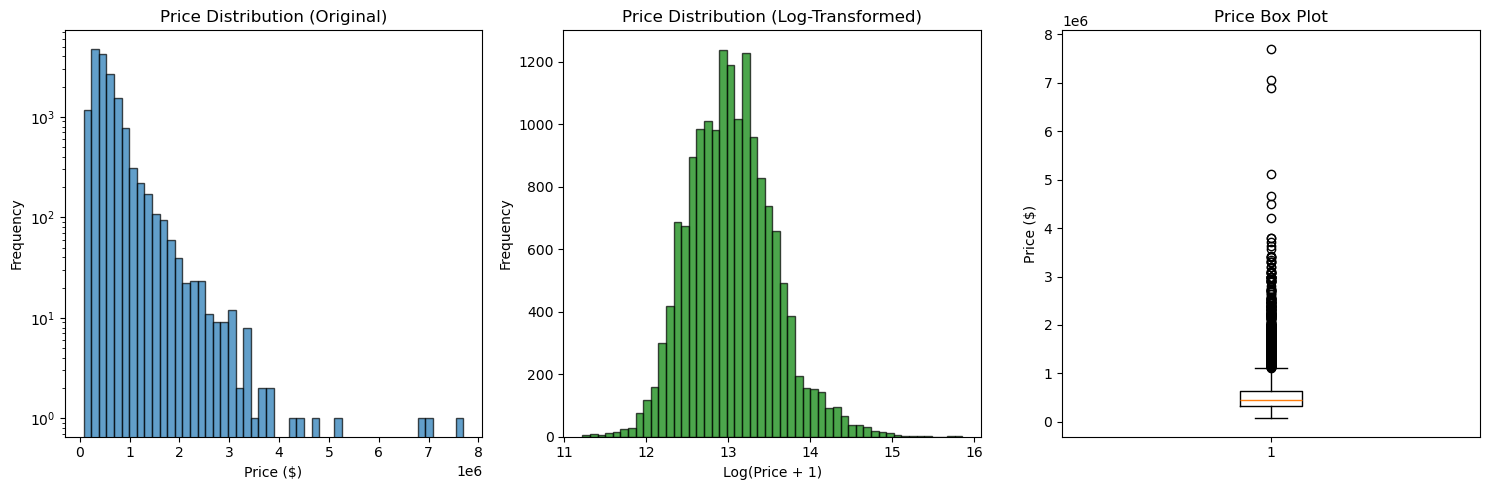

Price Statistics:
Mean: $537,470.28
Median: $450,000.00
Std: $360,303.58
Min: $75,000.00
Max: $7,700,000.00


In [6]:
# Distribution of Target Variable (Price)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Price Distribution (Original)')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.yscale('log')

plt.subplot(1, 3, 2)
plt.hist(np.log1p(df['price']), bins=50, edgecolor='black', alpha=0.7, color='green')
plt.title('Price Distribution (Log-Transformed)')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.boxplot(df['price'])
plt.title('Price Box Plot')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()

print(f"Price Statistics:")
print(f"Mean: ${df['price'].mean():,.2f}")
print(f"Median: ${df['price'].median():,.2f}")
print(f"Std: ${df['price'].std():,.2f}")
print(f"Min: ${df['price'].min():,.2f}")
print(f"Max: ${df['price'].max():,.2f}")


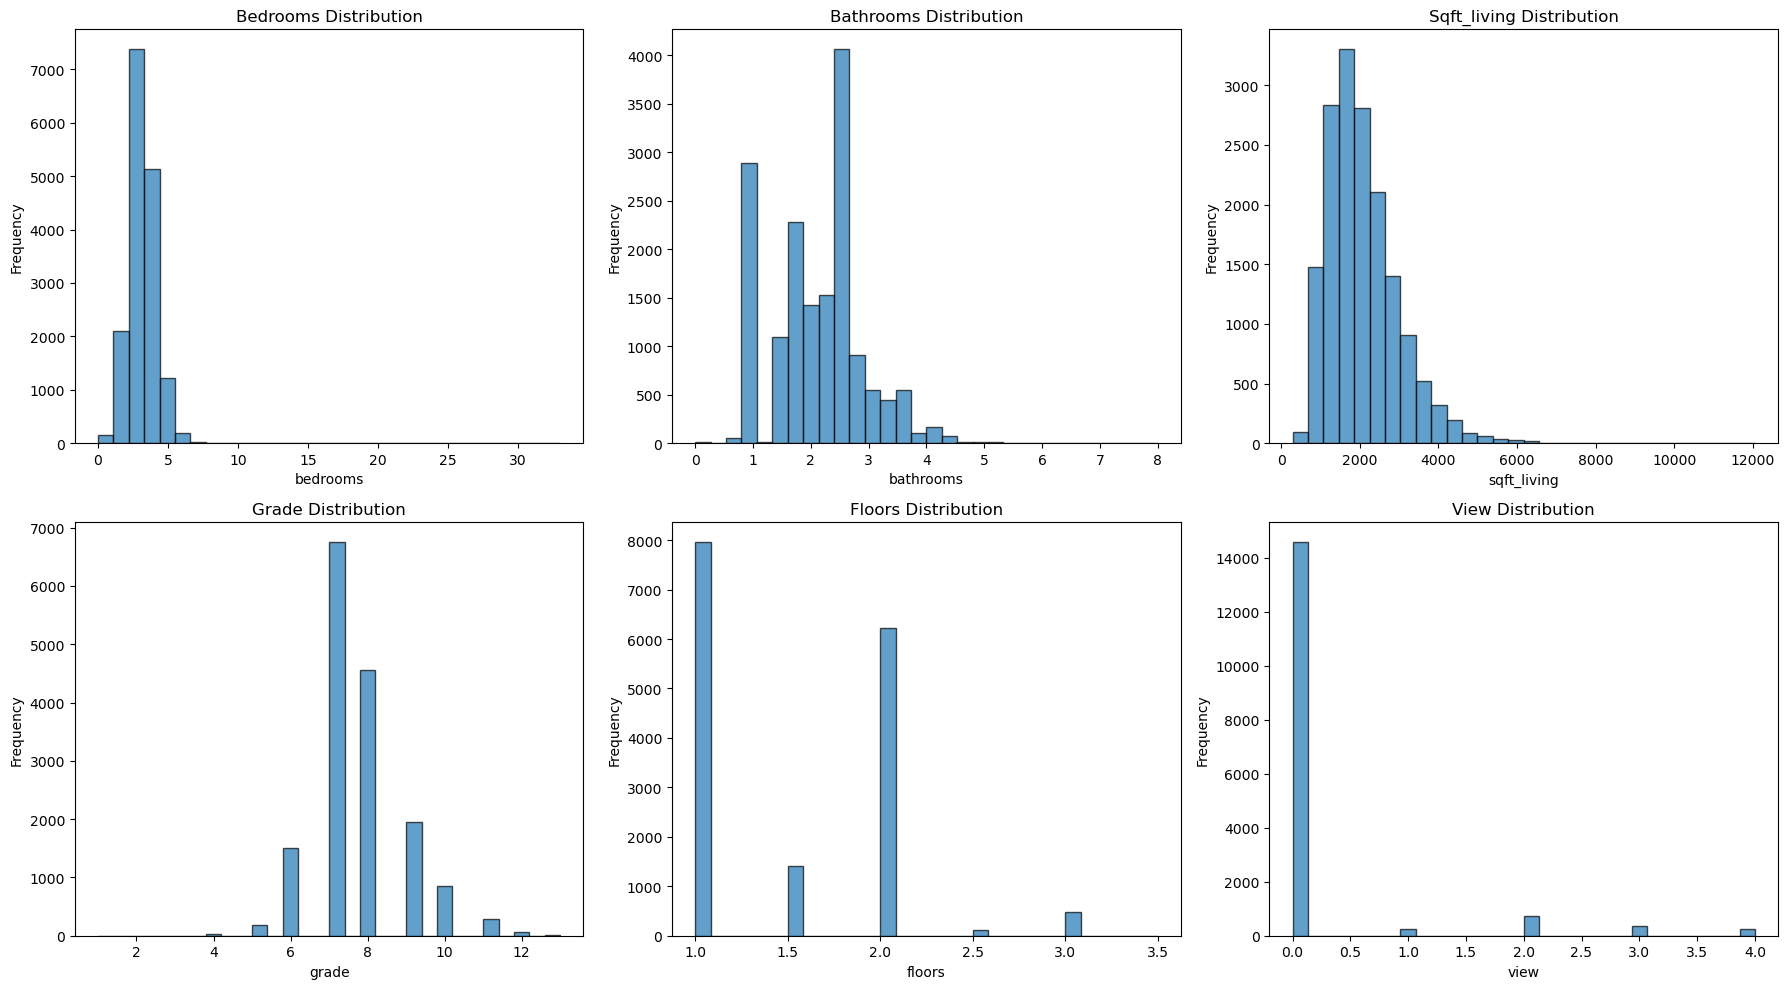

In [7]:
# Distribution of Key Features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

features_to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'floors', 'view']

for idx, feature in enumerate(features_to_plot):
    row = idx // 3
    col = idx % 3
    axes[row, col].hist(df[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'{feature.capitalize()} Distribution')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


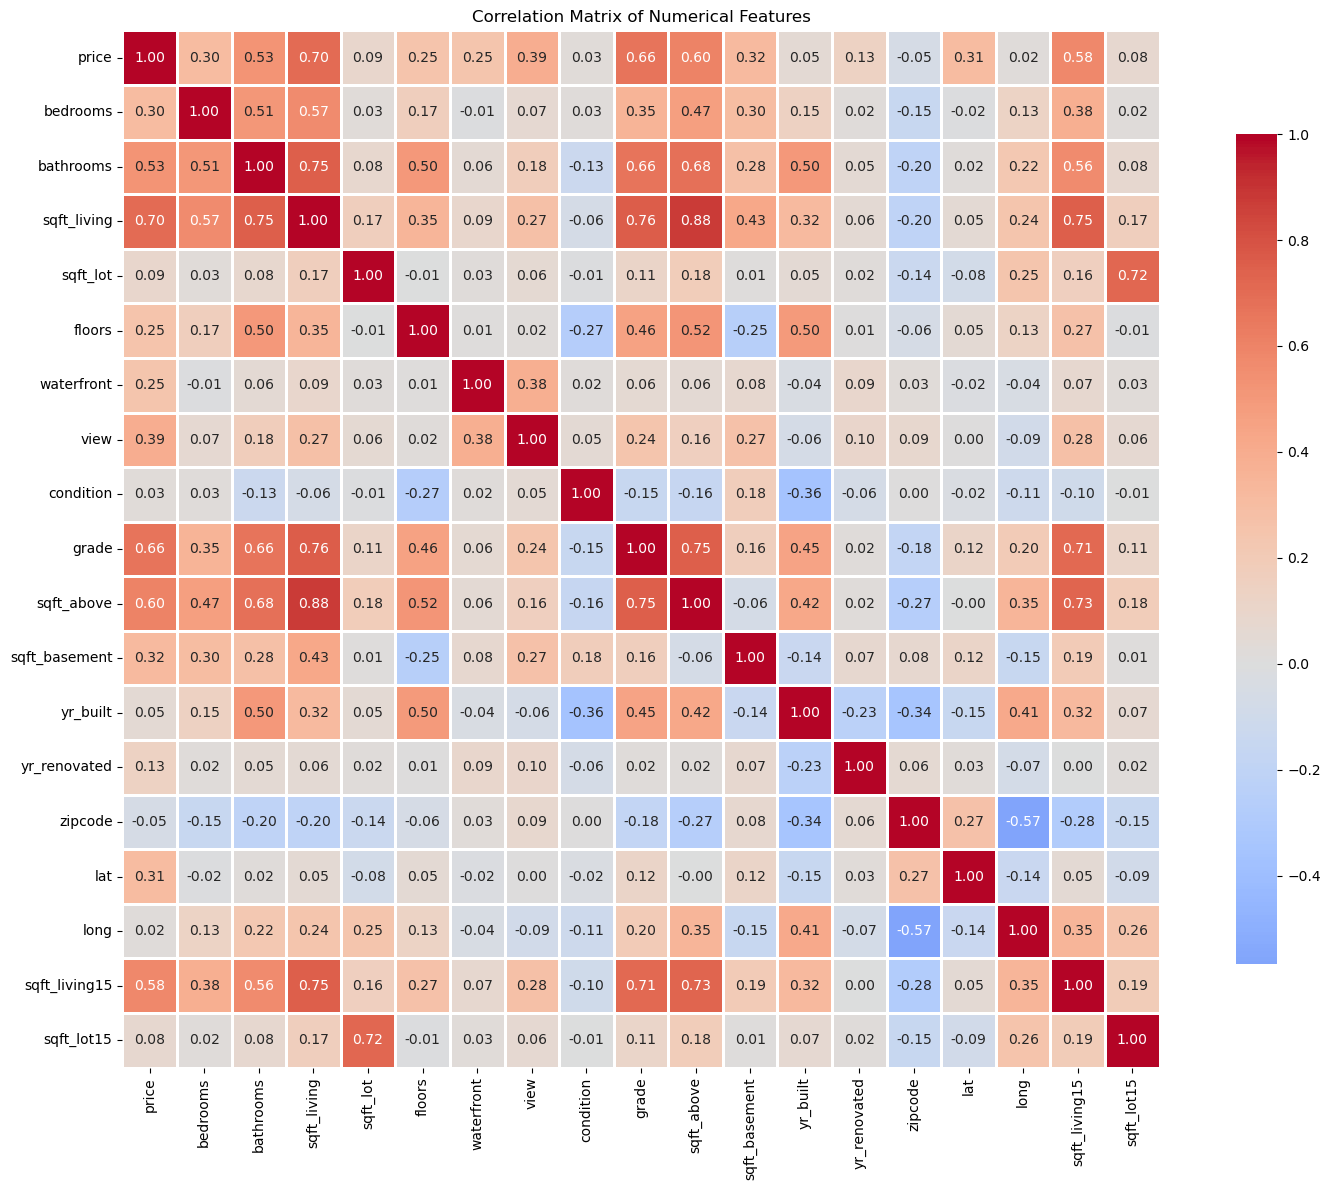

In [8]:
# Correlation Analysis (Before Transformation)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in numeric_cols:
    numeric_cols.remove('id')

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()



--- Correlation Factors (with Original Price) ---
price            1.000000
sqft_living      0.700933
grade            0.664266
sqft_above       0.602648
sqft_living15    0.581781
bathrooms        0.525487
view             0.390534
sqft_basement    0.320301
lat              0.310008
bedrooms         0.304454
floors           0.251428
waterfront       0.245221
yr_renovated     0.133075
sqft_lot         0.088526
sqft_lot15       0.076060
yr_built         0.048307
condition        0.031333
long             0.024279
zipcode         -0.054517
Name: price, dtype: float64


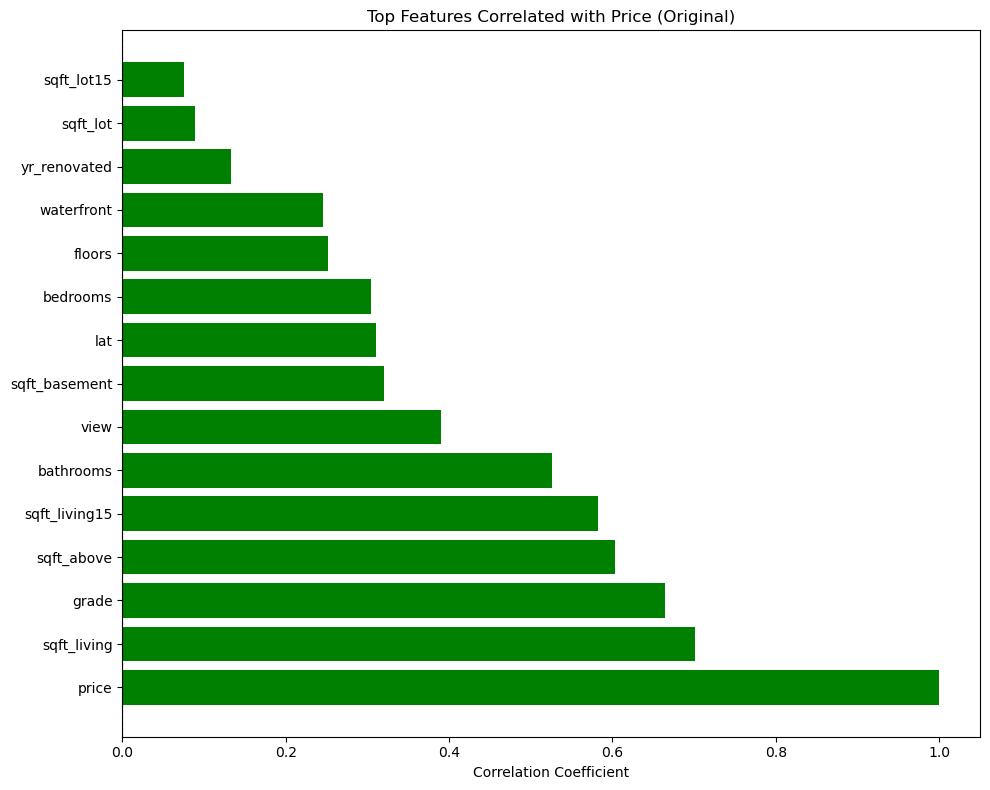

In [9]:
# Calculate correlation with price (original)
correlations = df[numeric_cols].corr()['price'].sort_values(ascending=False)

print("\n--- Correlation Factors (with Original Price) ---")
print(correlations)

# Visualize the top correlations
plt.figure(figsize=(10, 8))
top_corr = correlations.head(15)
colors = ['red' if x < 0 else 'green' for x in top_corr.values]
plt.barh(range(len(top_corr)), top_corr.values, color=colors)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Correlation Coefficient')
plt.title('Top Features Correlated with Price (Original)')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()


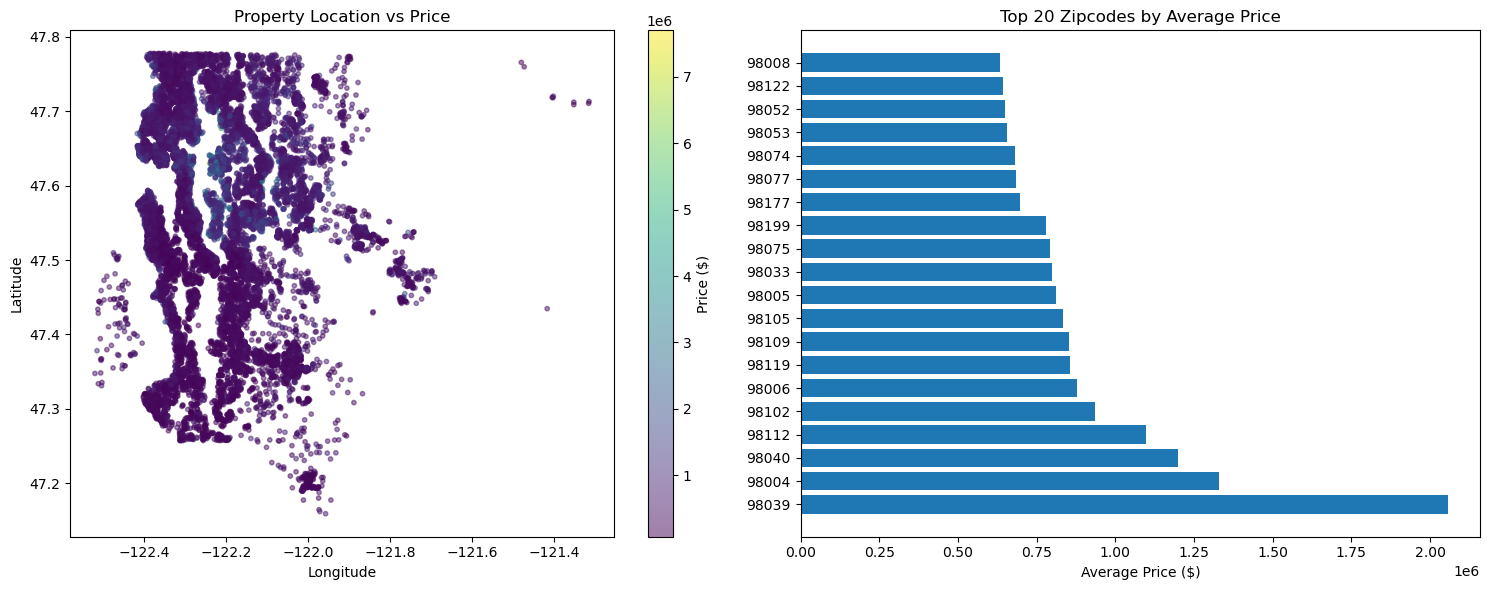

In [10]:
# Geospatial Analysis
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['long'], df['lat'], c=df['price'], cmap='viridis', alpha=0.5, s=10)
plt.colorbar(label='Price ($)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Property Location vs Price')

plt.subplot(1, 2, 2)
price_per_zip = df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(20)
plt.barh(range(len(price_per_zip)), price_per_zip.values)
plt.yticks(range(len(price_per_zip)), price_per_zip.index)
plt.xlabel('Average Price ($)')
plt.title('Top 20 Zipcodes by Average Price')
plt.tight_layout()
plt.show()


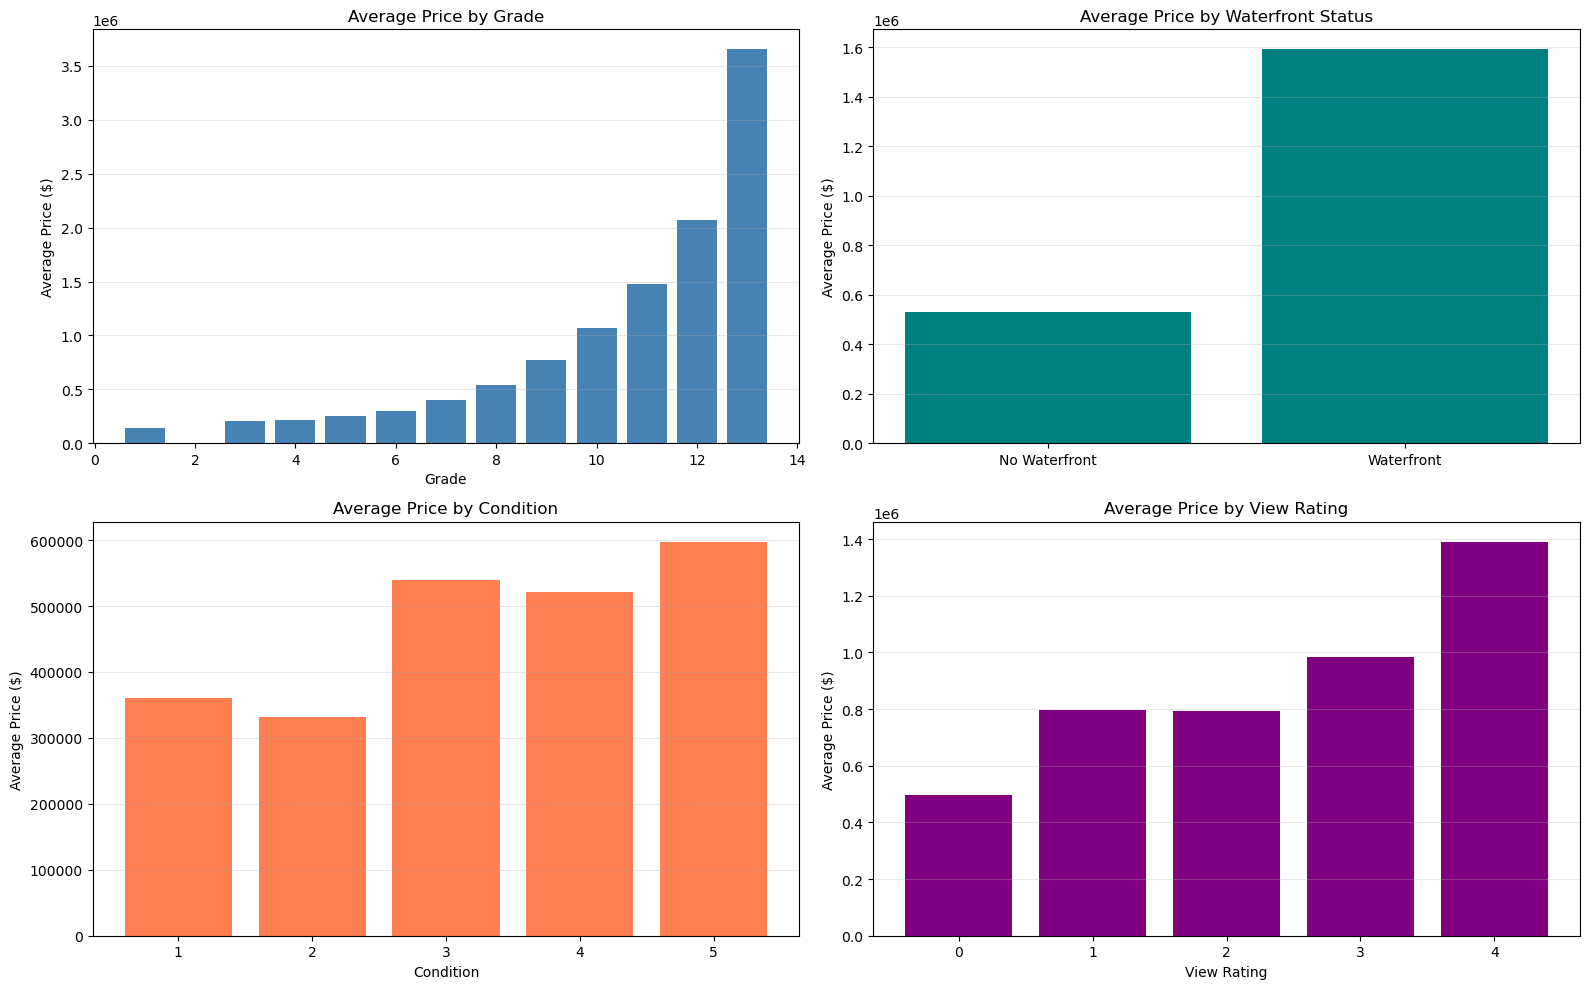

In [11]:
# Analyze price by different categories
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Price by Grade
grade_price = df.groupby('grade')['price'].mean()
axes[0, 0].bar(grade_price.index, grade_price.values, color='steelblue')
axes[0, 0].set_xlabel('Grade')
axes[0, 0].set_ylabel('Average Price ($)')
axes[0, 0].set_title('Average Price by Grade')
axes[0, 0].grid(axis='y', alpha=0.3)

# Price by Waterfront
waterfront_price = df.groupby('waterfront')['price'].mean()
axes[0, 1].bar(['No Waterfront', 'Waterfront'], waterfront_price.values, color='teal')
axes[0, 1].set_ylabel('Average Price ($)')
axes[0, 1].set_title('Average Price by Waterfront Status')
axes[0, 1].grid(axis='y', alpha=0.3)

# Price by Condition
condition_price = df.groupby('condition')['price'].mean()
axes[1, 0].bar(condition_price.index, condition_price.values, color='coral')
axes[1, 0].set_xlabel('Condition')
axes[1, 0].set_ylabel('Average Price ($)')
axes[1, 0].set_title('Average Price by Condition')
axes[1, 0].grid(axis='y', alpha=0.3)

# Price by View
view_price = df.groupby('view')['price'].mean()
axes[1, 1].bar(view_price.index, view_price.values, color='purple')
axes[1, 1].set_xlabel('View Rating')
axes[1, 1].set_ylabel('Average Price ($)')
axes[1, 1].set_title('Average Price by View Rating')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


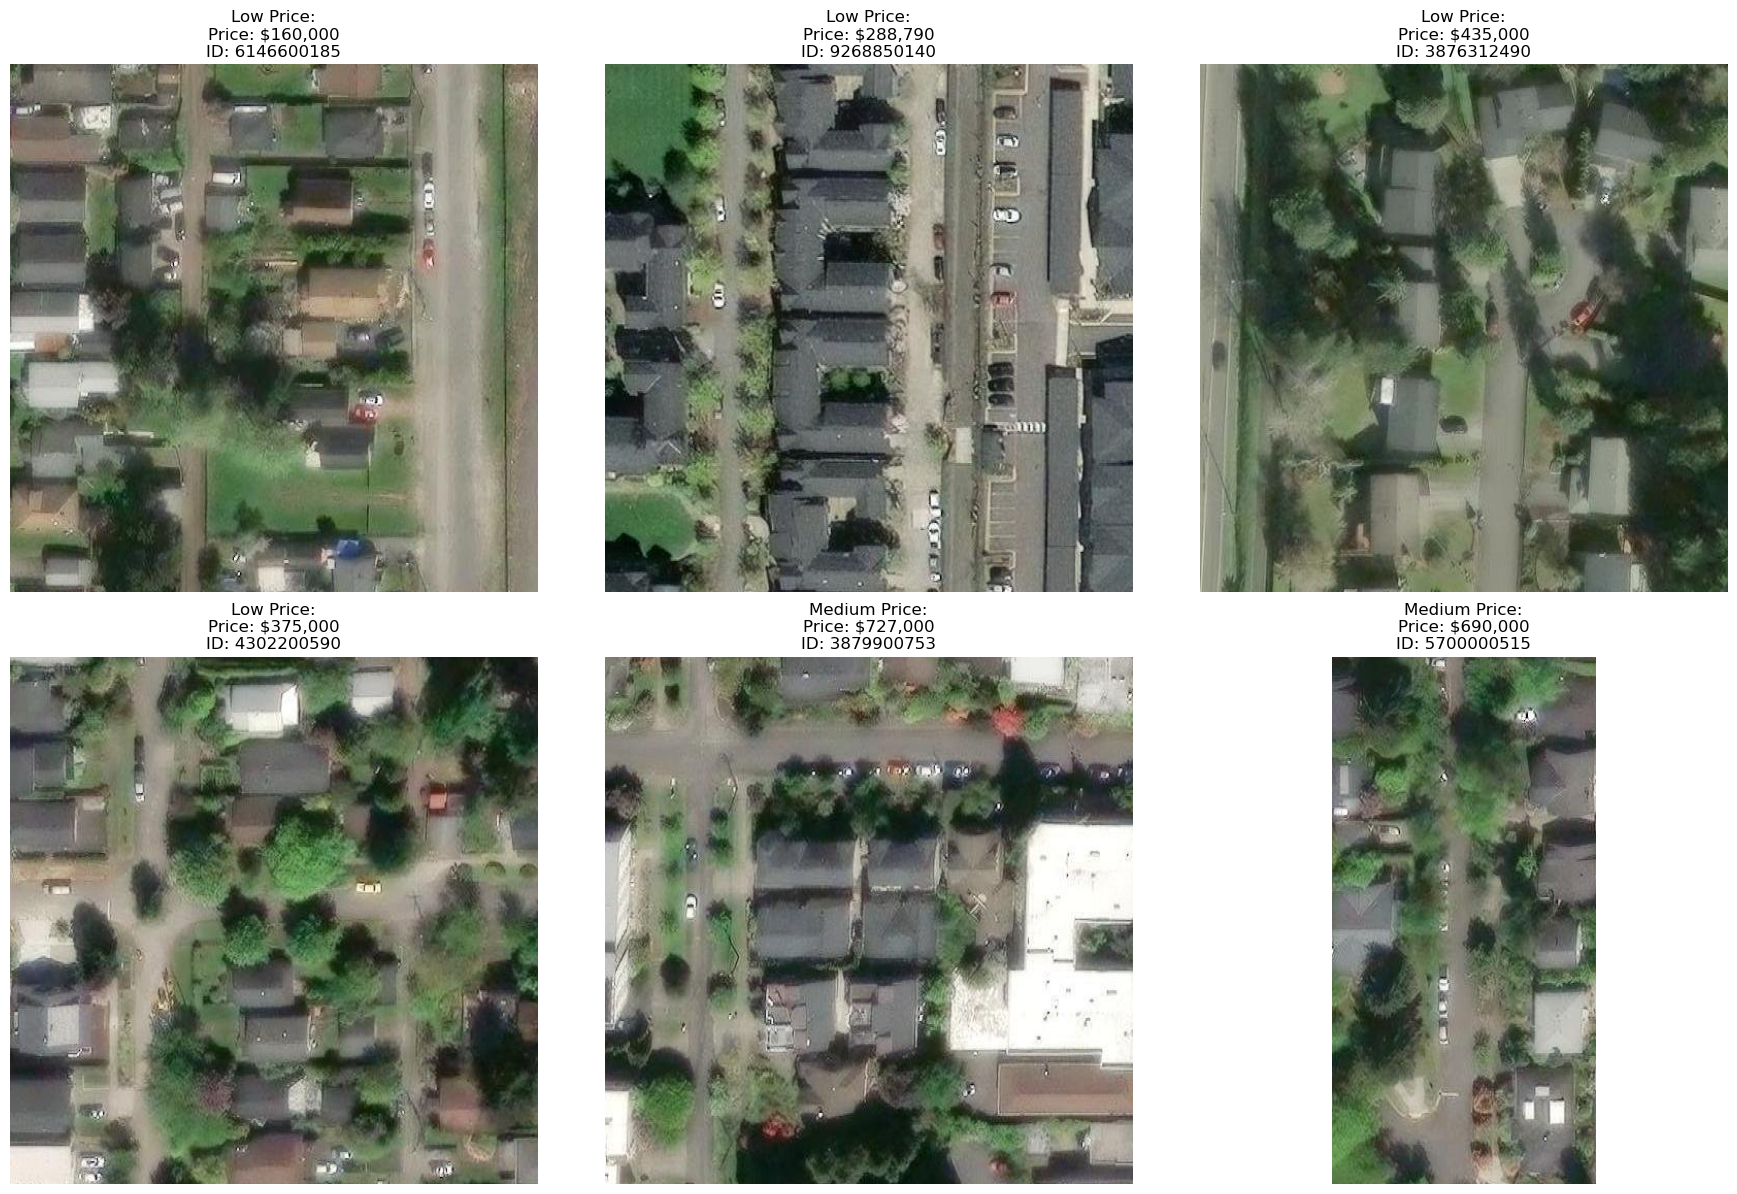

In [12]:
# Sample satellite images visualization
def visualize_sample_images(df, n_samples=6):
    """Visualize sample satellite images for properties with different price ranges"""
    # Get samples from different price quartiles
    q1_price = df['price'].quantile(0.25)
    q2_price = df['price'].quantile(0.50)
    q3_price = df['price'].quantile(0.75)
    
    samples = [
        df[df['price'] <= q1_price].sample(min(2, len(df[df['price'] <= q1_price]))),
        df[(df['price'] > q1_price) & (df['price'] <= q2_price)].sample(min(2, len(df[(df['price'] > q1_price) & (df['price'] <= q2_price)]))),
        df[df['price'] > q3_price].sample(min(2, len(df[df['price'] > q3_price])))
    ]
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    labels = ['Low Price', 'Medium Price', 'High Price']
    idx = 0
    
    for i, sample_group in enumerate(samples):
        for _, row in sample_group.iterrows():
            if idx < n_samples:
                img_path = os.path.join(IMAGE_DIR, f"{row['id']}.png")
                if os.path.exists(img_path):
                    try:
                        img = Image.open(img_path)
                        axes[idx].imshow(img)
                        axes[idx].set_title(f"{labels[i//2]}:\nPrice: ${row['price']:,.0f}\nID: {row['id']}")
                        axes[idx].axis('off')
                        idx += 1
                    except:
                        axes[idx].text(0.5, 0.5, 'Image Error', ha='center', va='center')
                        axes[idx].axis('off')
                        idx += 1
                else:
                    axes[idx].text(0.5, 0.5, 'Image Not Found', ha='center', va='center')
                    axes[idx].axis('off')
                    idx += 1
    
    plt.tight_layout()
    plt.show()

# Visualize sample images (only if images exist)
if df['image_exists'].sum() > 0:
    visualize_sample_images(df)
else:
    print("⚠️ No images found. Skipping image visualization.")


## 4. Data Transformation


In [13]:
# Apply Log Transformation to skewed features
# We use log1p (log(1+x)) to safely handle any zero values
df_transformed = df.copy()

skewed_cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

print("Applying log transformation to skewed columns...")
for col in skewed_cols:
    if col in df_transformed.columns:
        df_transformed[col] = np.log1p(df_transformed[col])
        print(f"✅ Transformed: {col}")

print("\n✅ Log transformation applied successfully.")


Applying log transformation to skewed columns...
✅ Transformed: price
✅ Transformed: sqft_living
✅ Transformed: sqft_lot
✅ Transformed: sqft_above
✅ Transformed: sqft_basement
✅ Transformed: sqft_living15
✅ Transformed: sqft_lot15

✅ Log transformation applied successfully.


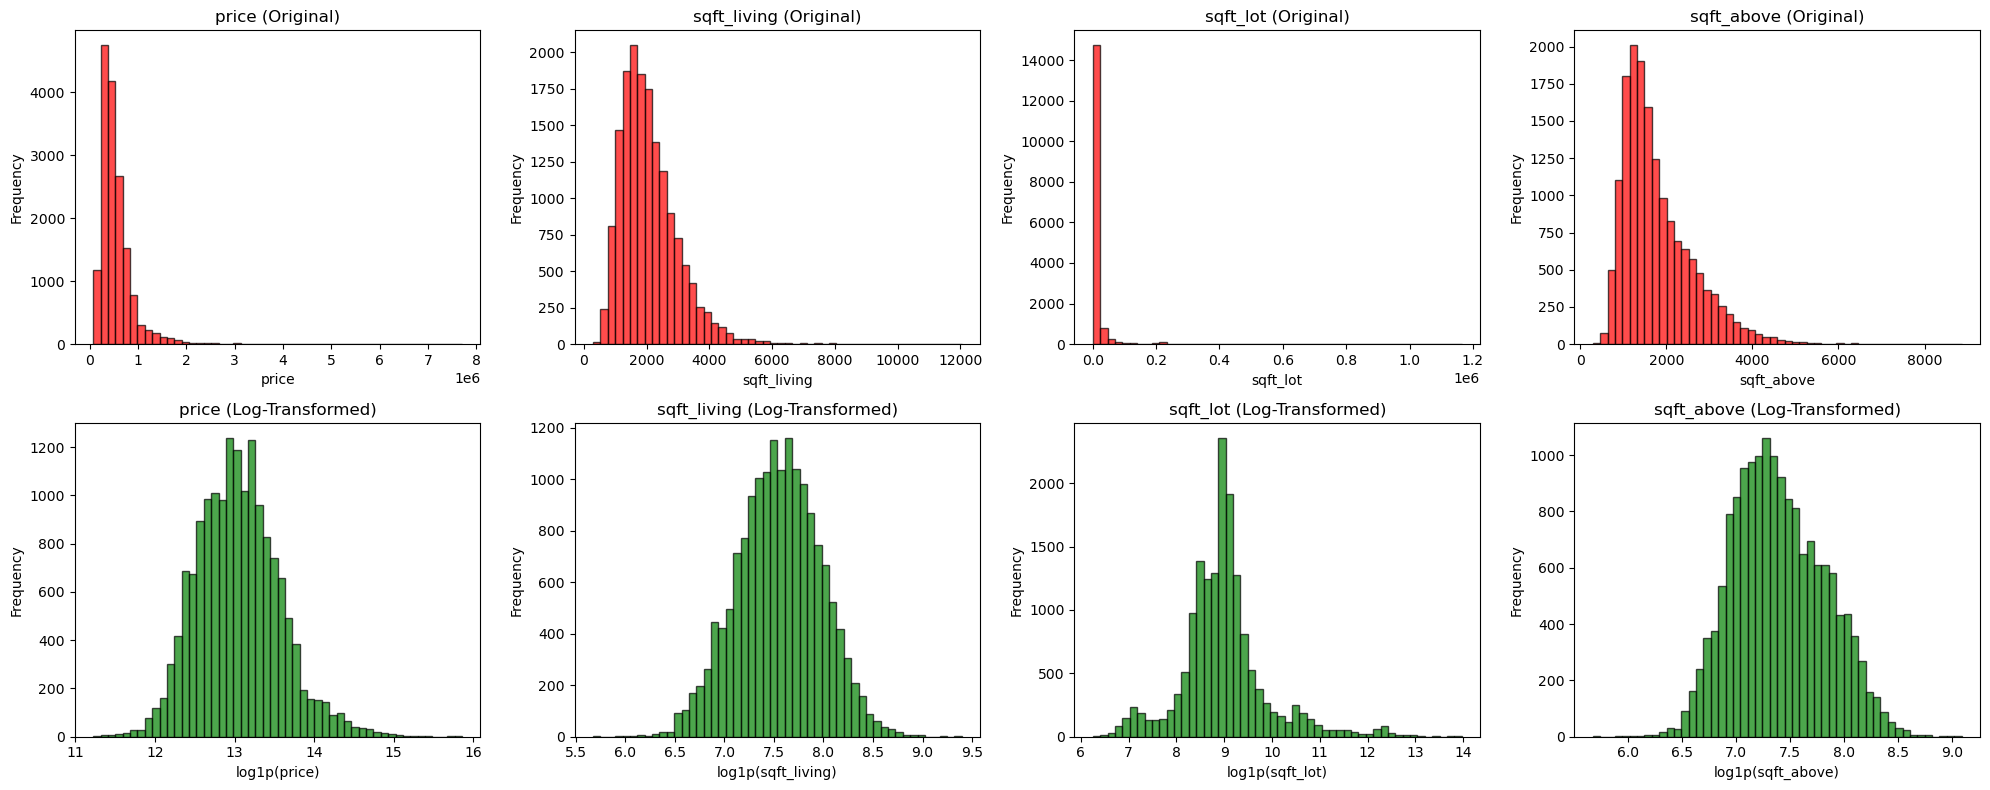

In [14]:
# Verify transformation effect
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for idx, col in enumerate(['price', 'sqft_living', 'sqft_lot', 'sqft_above']):
    # Original distribution
    axes[0, idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7, color='red')
    axes[0, idx].set_title(f'{col} (Original)')
    axes[0, idx].set_xlabel(col)
    axes[0, idx].set_ylabel('Frequency')
    
    # Transformed distribution
    axes[1, idx].hist(df_transformed[col], bins=50, edgecolor='black', alpha=0.7, color='green')
    axes[1, idx].set_title(f'{col} (Log-Transformed)')
    axes[1, idx].set_xlabel(f'log1p({col})')
    axes[1, idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



--- Correlation Factors (with Log-Price) ---
price            1.000000
grade            0.700249
sqft_living      0.671430
sqft_living15    0.603558
sqft_above       0.581300
bathrooms        0.550492
lat              0.452503
view             0.340868
bedrooms         0.337664
floors           0.305348
sqft_basement    0.239789
waterfront       0.161167
sqft_lot         0.134184
sqft_lot15       0.119696
yr_renovated     0.119410
yr_built         0.076376
long             0.052900
condition        0.033024
id              -0.007350
zipcode         -0.039803
image_exists          NaN
Name: price, dtype: float64


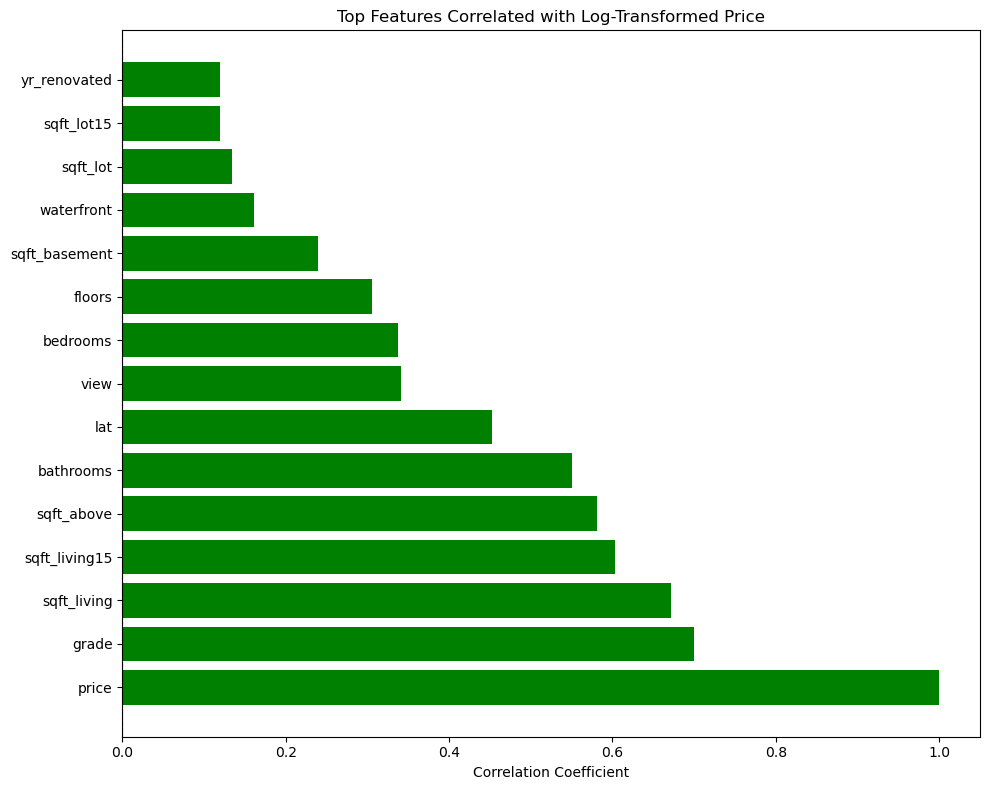

In [15]:
# Calculate correlation with the transformed price
correlations_transformed = df_transformed.corr(numeric_only=True)['price'].sort_values(ascending=False)

print("\n--- Correlation Factors (with Log-Price) ---")
print(correlations_transformed)

# Visualize the top correlations after transformation
plt.figure(figsize=(10, 8))
top_corr = correlations_transformed.head(15)
colors = ['red' if x < 0 else 'green' for x in top_corr.values]
plt.barh(range(len(top_corr)), top_corr.values, color=colors)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Correlation Coefficient')
plt.title('Top Features Correlated with Log-Transformed Price')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()


## 5. Feature Selection


In [16]:
# Feature selection based on correlation and domain knowledge
# Drop features with low correlation (< 0.1) and redundant features
cols_to_drop = ['id', 'zipcode', 'condition', 'long', 'yr_renovated', 'sqft_lot', 'sqft_lot15']

print(f"Features to drop: {cols_to_drop}")
print(f"\nReasoning:")
print("- 'id': Non-predictive identifier")
print("- 'zipcode': Redundant with lat/long, also has negative correlation")
print("- 'condition': Very low correlation (0.033)")
print("- 'long': Low correlation (0.053)")
print("- 'yr_renovated': Low correlation and many zeros")
print("- 'sqft_lot', 'sqft_lot15': Low correlation and redundancy with sqft_living")

# Create refined feature set
df_refined = df_transformed.drop(columns=[col for col in cols_to_drop if col in df_transformed.columns])

print(f"\n✅ Features retained: {list(df_refined.columns)}")
print(f"Original features: {len(df.columns)}")
print(f"Refined features: {len(df_refined.columns)}")


Features to drop: ['id', 'zipcode', 'condition', 'long', 'yr_renovated', 'sqft_lot', 'sqft_lot15']

Reasoning:
- 'id': Non-predictive identifier
- 'zipcode': Redundant with lat/long, also has negative correlation
- 'condition': Very low correlation (0.033)
- 'long': Low correlation (0.053)
- 'yr_renovated': Low correlation and many zeros
- 'sqft_lot', 'sqft_lot15': Low correlation and redundancy with sqft_living

✅ Features retained: ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'sqft_living15', 'image_exists']
Original features: 22
Refined features: 15


## 6. Feature Engineering


In [17]:
# Prepare data for feature engineering
from sklearn.model_selection import train_test_split

# Define X and y
X = df_refined.drop(columns=['price'])
y = df_refined['price']

# Leak-Proof Split (before any feature engineering that uses target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Features before engineering: {X_train.shape[1]}")


Training samples: 12967
Testing samples: 3242
Features before engineering: 14


In [18]:
# Feature Engineering Step 1: Basic Transformations
print("=== Feature Engineering Step 1: Basic Transformations ===")

for df_set in [X_train, X_test]:
    # House Age at time of dataset (2015)
    df_set['house_age'] = 2015 - df_set['yr_built']
    
    # Ratio of living space to the floor above (Density)
    df_set['living_density'] = df_set['sqft_living'] / (df_set['sqft_above'] + 1)
    
    # Total bathrooms and bedrooms combined
    df_set['total_rooms'] = df_set['bathrooms'] + df_set['bedrooms']

# Drop yr_built as it's now represented by 'house_age'
X_train.drop(columns=['yr_built'], inplace=True, errors='ignore')
X_test.drop(columns=['yr_built'], inplace=True, errors='ignore')

print("✅ Basic transformations complete")
print(f"New features: house_age, living_density, total_rooms")


=== Feature Engineering Step 1: Basic Transformations ===
✅ Basic transformations complete
New features: house_age, living_density, total_rooms


In [19]:
# Feature Engineering Step 2: Spatial Features (Leak-Proof)
print("=== Feature Engineering Step 2: Spatial Features ===")

# Calculate Luxury Hub (Wealth Center) based ONLY on Training Data
luxury_threshold = y_train.quantile(0.95)
luxury_hub = X_train[y_train >= luxury_threshold]
hub_lat = luxury_hub['lat'].mean()
hub_long = -122.235415  # Approximate center, can be calculated if 'long' is available

print(f"Luxury Hub Location (from training data):")
print(f"Latitude: {hub_lat:.6f}")

# Calculate distance to luxury hub (using only lat for now, can add long if available)
for df_set in [X_train, X_test]:
    # Distance to luxury hub (using lat only, assuming long is consistent)
    df_set['dist_to_hub'] = np.abs(df_set['lat'] - hub_lat)
    
    # If 'long' exists, use it for better distance calculation
    if 'long' in df_set.columns:
        df_set['dist_to_hub'] = np.sqrt((df_set['lat'] - hub_lat)**2 + (df_set['long'] - hub_long)**2)
        # Coordinate Rotation (45 degrees) for better spatial representation
        df_set['rot_x'] = 0.707 * df_set['lat'] + 0.707 * df_set['long']
        df_set['rot_y'] = 0.707 * df_set['lat'] - 0.707 * df_set['long']
    else:
        # Fallback if long was dropped
        df_set['dist_to_hub'] = np.abs(df_set['lat'] - hub_lat)

print("✅ Spatial features created")
print(f"New features: dist_to_hub, rot_x, rot_y (if long available)")


=== Feature Engineering Step 2: Spatial Features ===
Luxury Hub Location (from training data):
Latitude: 47.617296
✅ Spatial features created
New features: dist_to_hub, rot_x, rot_y (if long available)


In [20]:
# Feature Engineering Step 3: Interaction Features
print("=== Feature Engineering Step 3: Interaction Features ===")

for df_set in [X_train, X_test]:
    # Quality-to-Size ratio: Is it a small luxury home or a big cheap one?
    df_set['quality_density'] = df_set['grade'] / (df_set['sqft_living'] + 1)
    
    # Luxury Index (will be combined with visual_score later)
    # For now, use grade as proxy
    df_set['luxury_index'] = df_set['grade'] * df_set.get('visual_score', 1)  # Placeholder if visual_score not available
    
    # Bedroom to Bathroom Ratio
    df_set['bed_bath_ratio'] = df_set['bedrooms'] / (df_set['bathrooms'] + 1)
    
    # Luxury Score (Grade * Living Space)
    df_set['luxury_score'] = df_set['grade'] * df_set['sqft_living']

print("✅ Interaction features created")
print(f"New features: quality_density, luxury_index, bed_bath_ratio, luxury_score")


=== Feature Engineering Step 3: Interaction Features ===
✅ Interaction features created
New features: quality_density, luxury_index, bed_bath_ratio, luxury_score


In [21]:
# Feature Engineering Step 4: Neighborhood Features (Leak-Proof)
print("=== Feature Engineering Step 4: Neighborhood Features ===")

from sklearn.neighbors import KNeighborsRegressor

# Create spatial price index based on location and size (using training data only)
knn_spatial = KNeighborsRegressor(n_neighbors=15, weights='distance')
knn_spatial.fit(X_train[['lat', 'sqft_living']], y_train)

# Predict neighborhood price for both train and test
X_train['neighborhood_price'] = knn_spatial.predict(X_train[['lat', 'sqft_living']])
X_test['neighborhood_price'] = knn_spatial.predict(X_test[['lat', 'sqft_living']])

print("✅ Neighborhood features created")
print(f"New features: neighborhood_price")


=== Feature Engineering Step 4: Neighborhood Features ===
✅ Neighborhood features created
New features: neighborhood_price


In [22]:
# Feature Engineering Step 5: Visual Feature Extraction (Placeholder)
print("=== Feature Engineering Step 5: Visual Feature Extraction ===")
print("Note: Visual features will be extracted in the main training notebook")
print("This is a placeholder to show where visual_score would be added")

# Placeholder for visual_score (will be added during model training)
# X_train['visual_score'] = extract_visual_scores(X_train['id'])
# X_test['visual_score'] = extract_visual_scores(X_test['id'])

print("⚠️ Visual score extraction skipped here (done in model_training.ipynb)")


=== Feature Engineering Step 5: Visual Feature Extraction ===
Note: Visual features will be extracted in the main training notebook
This is a placeholder to show where visual_score would be added
⚠️ Visual score extraction skipped here (done in model_training.ipynb)


In [23]:
# Drop non-predictive columns and clean up
cols_to_remove = ['id', 'date']

for df_set in [X_train, X_test]:
    df_set.drop(columns=cols_to_remove, inplace=True, errors='ignore')

print("✅ Final feature cleaning complete")
print(f"\nFinal feature count: {X_train.shape[1]}")
print(f"\nFinal features:")
for i, col in enumerate(X_train.columns, 1):
    print(f"{i}. {col}")


✅ Final feature cleaning complete

Final feature count: 21

Final features:
1. bedrooms
2. bathrooms
3. sqft_living
4. floors
5. waterfront
6. view
7. grade
8. sqft_above
9. sqft_basement
10. lat
11. sqft_living15
12. image_exists
13. house_age
14. living_density
15. total_rooms
16. dist_to_hub
17. quality_density
18. luxury_index
19. bed_bath_ratio
20. luxury_score
21. neighborhood_price


In [24]:
# Final data overview
print("=== Final Preprocessed Data Overview ===")
print(f"\nTraining Set:")
print(f"Shape: {X_train.shape}")
print(f"Target shape: {y_train.shape}")
print(f"\nTest Set:")
print(f"Shape: {X_test.shape}")
print(f"Target shape: {y_test.shape}")

print(f"\nData Types:")
print(X_train.dtypes.value_counts())

print(f"\nFirst few rows of training data:")
X_train.head()


=== Final Preprocessed Data Overview ===

Training Set:
Shape: (12967, 21)
Target shape: (12967,)

Test Set:
Shape: (3242, 21)
Target shape: (3242,)

Data Types:
float64    14
int64       6
bool        1
Name: count, dtype: int64

First few rows of training data:


bedrooms  bathrooms  sqft_living  floors  waterfront  view  grade  \
4140          3       1.00     7.107425     1.0           0     0      6   
1510          2       2.00     7.606387     1.5           0     0      7   
6706          4       2.50     7.852050     2.0           0     0      9   
11009         4       2.25     7.916078     1.0           0     2     10   
6554          4       5.25     8.564268     2.0           0     2     10   

       sqft_above  sqft_basement      lat  sqft_living15  image_exists  \
4140     7.107425       0.000000  47.5297       7.003974          True   
1510     7.280008       6.329721  47.5596       7.415175          True   
6706     7.852050       0.000000  47.6378       7.923348          True   
11009    7.591357       6.634633  47.7117       7.934155          True   
6554     8.564268       0.000000  47.5605       7.565793          True   

       house_age  living_density  total_rooms  dist_to_hub  quality_density  \
4140          57        0.876656         4.00     0.087596         0.740062   
1510          93        0.918645         4.00     0.057696         0.813349   
6706          17        0.887032         6.50     0.020504         1.016714   
11009         62        0.921400         6.25     0.094404         1.121569   
6554           9        0.895444         9.25     0.056796         1.045558   

       luxury_index  bed_bath_ratio  luxury_score  neighborhood_price  
4140              6        1.500000     42.644553           12.566195  
1510              7        0.666667     53.244712           12.899222  
6706              9        1.142857     70.668452           13.480039  
11009            10        1.230769     79.160781           13.853770  
6554             10        0.640000     85.642676           14.437162

In [25]:
# Save preprocessed data (optional)
import joblib

# Save train/test splits
X_train.to_csv('train_preprocessed.csv', index=False)
X_test.to_csv('test_preprocessed.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Save spatial hub coordinates for later use
geo_constants = {
    'hub_lat': float(hub_lat),
    'hub_long': float(hub_long) if 'long' in X_train.columns else None
}

import json
with open('geo_constants.json', 'w') as f:
    json.dump(geo_constants, f)

print("✅ Preprocessed data saved")
print(f"Files saved:")
print("- train_preprocessed.csv")
print("- test_preprocessed.csv")
print("- y_train.csv")
print("- y_test.csv")
print("- geo_constants.json")


✅ Preprocessed data saved
Files saved:
- train_preprocessed.csv
- test_preprocessed.csv
- y_train.csv
- y_test.csv
- geo_constants.json
